In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import cv2

from functions.plot_images import plot_images
from functions.model_vgg import train_and_eval_VGG
from functions.model_cnn import train_and_eval_CNN

2024-02-23 15:56:39.837714: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


ImportError: cannot import name 'emnist' from 'tensorflow.keras.datasets' (/home/kevin/miniconda3/envs/ComputerVision/lib/python3.11/site-packages/keras/api/_v2/keras/datasets/__init__.py)

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Randomly split the training data into a training and validation set using train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Describe the shape of the training, validation, and test sets
for dataset, images in zip(['Training', 'Validation', 'Test'], [train_images, val_images, test_images]):
    print(f'{dataset} images shape: {images.shape}')

Training images shape: (48000, 28, 28)
Validation images shape: (12000, 28, 28)
Test images shape: (10000, 28, 28)


Training set 5 first images:


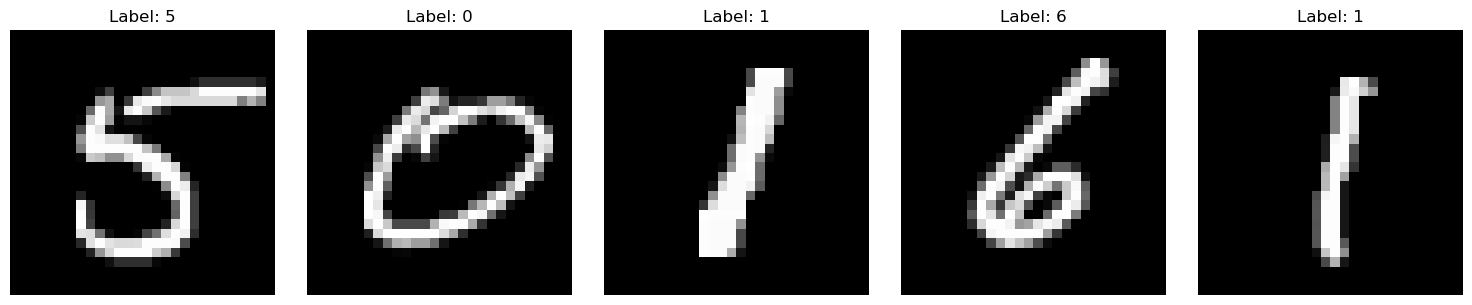

Validation set 5 first images:


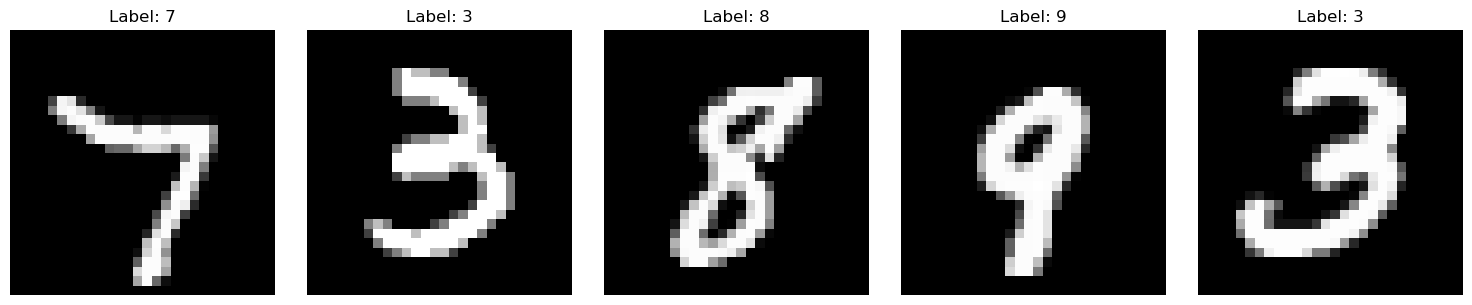

Test set 5 first images:


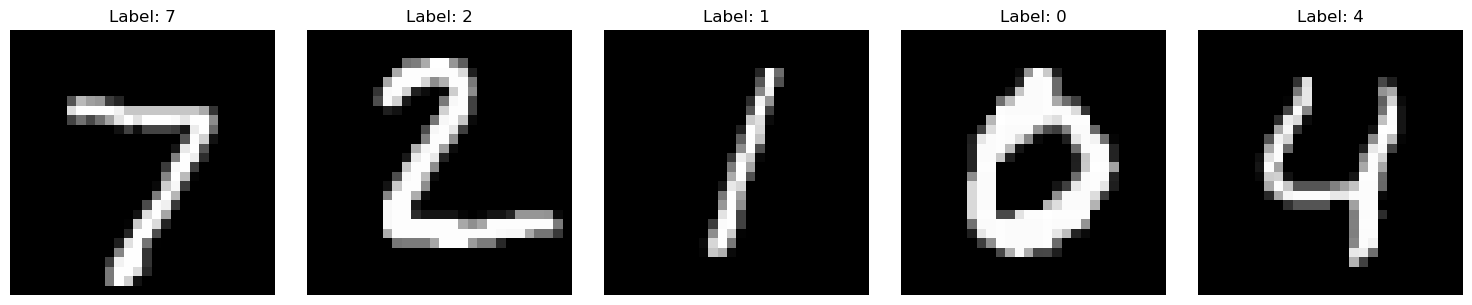

In [ ]:
# Plot the first 5 labels from each of the training, validation, and test sets
for dataset, images, labels in zip(['Training', 'Validation', 'Test'], [train_images, val_images, test_images], [train_labels, val_labels, test_labels]):
    print(f'{dataset} set 5 first images:')
    plot_images(images[:5], labels[:5])


Training set 5 first images:


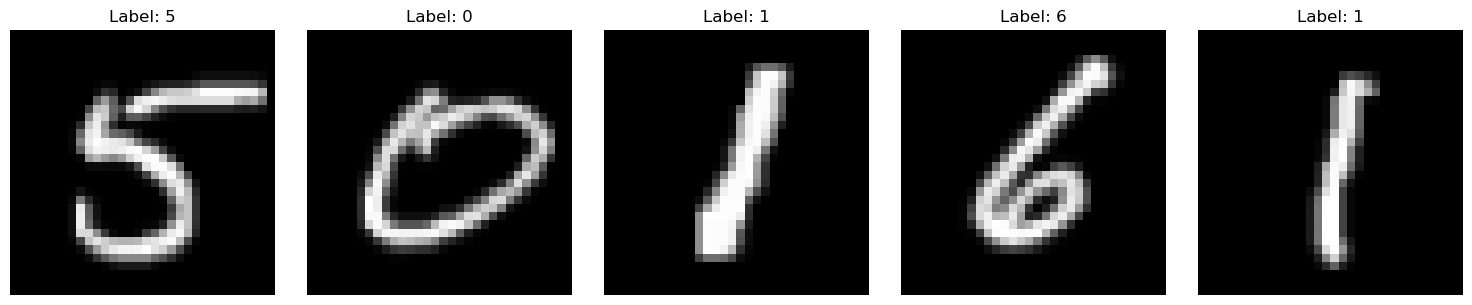

Validation set 5 first images:


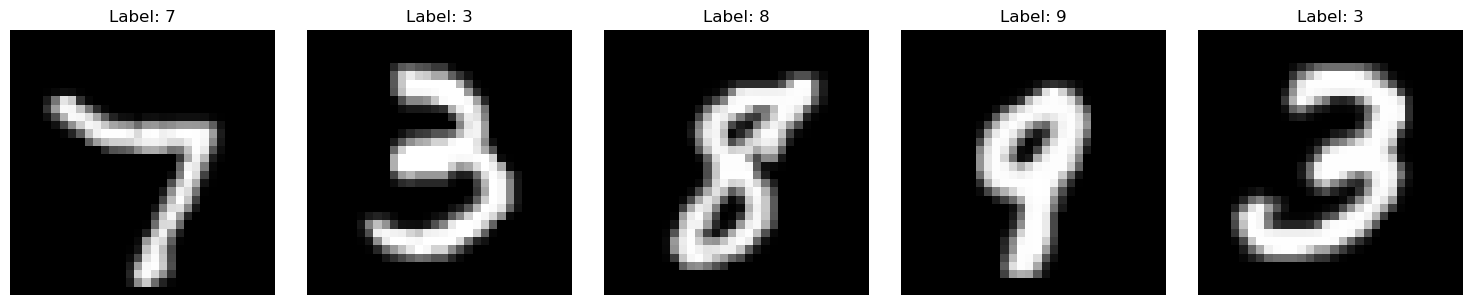

Test set 5 first images:


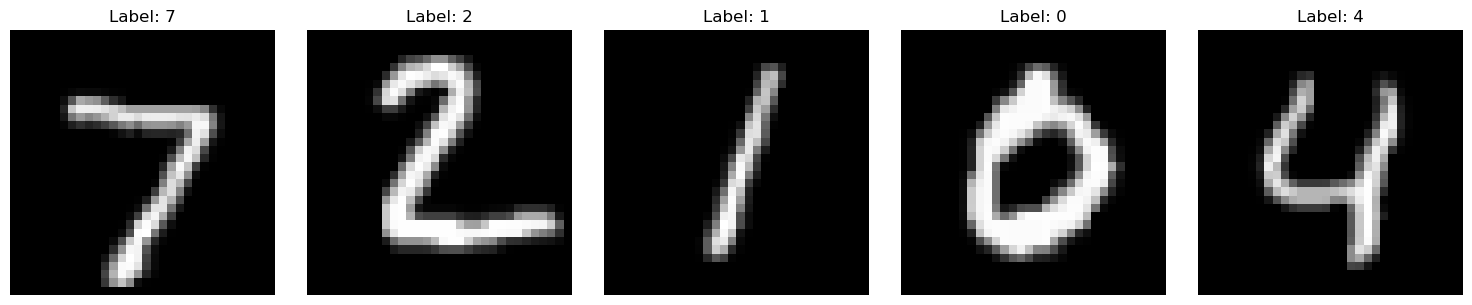

In [ ]:
# Add a channel dimension to the images ti fit model entry
X_train = train_images.reshape(train_images.shape[0], 28, 28, 1)
X_val = val_images.reshape(val_images.shape[0], 28, 28, 1)
X_test = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Normalize the images
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

# Print first image's new shape for verification
X_train[0].shape

# Re-plot the first 5 labels from each of the training, validation, and test sets
for dataset, images, labels in zip(['Training', 'Validation', 'Test'], [X_train, X_val, X_test], [train_labels, val_labels, test_labels]):
    print(f'{dataset} set 5 first images:')
    plot_images(images[:5], labels[:5])


In [ ]:
NUM_CLASSES = 10

# Convert the labels to one-hot encoding
y_train = to_categorical(train_labels, NUM_CLASSES)
y_val = to_categorical(val_labels, NUM_CLASSES)
y_test = to_categorical(test_labels, NUM_CLASSES)

In [ ]:
%%time

# Verify that the GPU is available
model = train_and_eval_CNN(X_train, y_train, X_val, y_val, X_test, y_test)

2024-02-23 11:44:54.991004: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,213,514
Trainable params: 3,213,514
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
750/750 [==========================

In [ ]:
# Save the model with pickle
import pickle
with open('../models/emnist_recon_model.keras', 'wb') as f:
    pickle.dump(model, f)